In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median, gaussian, prewitt, prewitt_h, prewitt_v, threshold_otsu

In [2]:
def histogram_strech(image, target_min, target_max, isFloat=False):
    """
    Stretches an image to a custom range of values.
    
    Parameters:
    -----------
    image : ndarray
        Input image (float or uint8)
    target_min : float or int
        Desired minimum value for the output image
    target_max : float or int
        Desired maximum value for the output image
    isFloat : bool
        If True, assumes input is float image (-1 to 1)
        If False, assumes input is uint8 image (0 to 255)
        
    Returns:
    --------
    ndarray
        Stretched image with values between target_min and target_max
    """
    
    # Make a copy to avoid modifying the original
    img = image.copy()
    
    # Get current min and max values
    current_min = np.min(img)
    current_max = np.max(img)
    
    # Handle empty range case
    if current_min == current_max:
        return np.full_like(img, target_min)
    
    # Define input range based on image type
    if isFloat:
        input_min = -1.0
        input_max = 1.0
    else:
        input_min = 0
        input_max = 255
    
    # First normalize to 0-1 range
    normalized = (img - current_min) / (current_max - current_min)
    
    # Then scale to input range
    scaled = normalized * (input_max - input_min) + input_min
    
    # Finally stretch to target range
    stretched = (scaled - input_min) / (input_max - input_min) * (target_max - target_min) + target_min
    
    return stretched

# Cartesian View

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

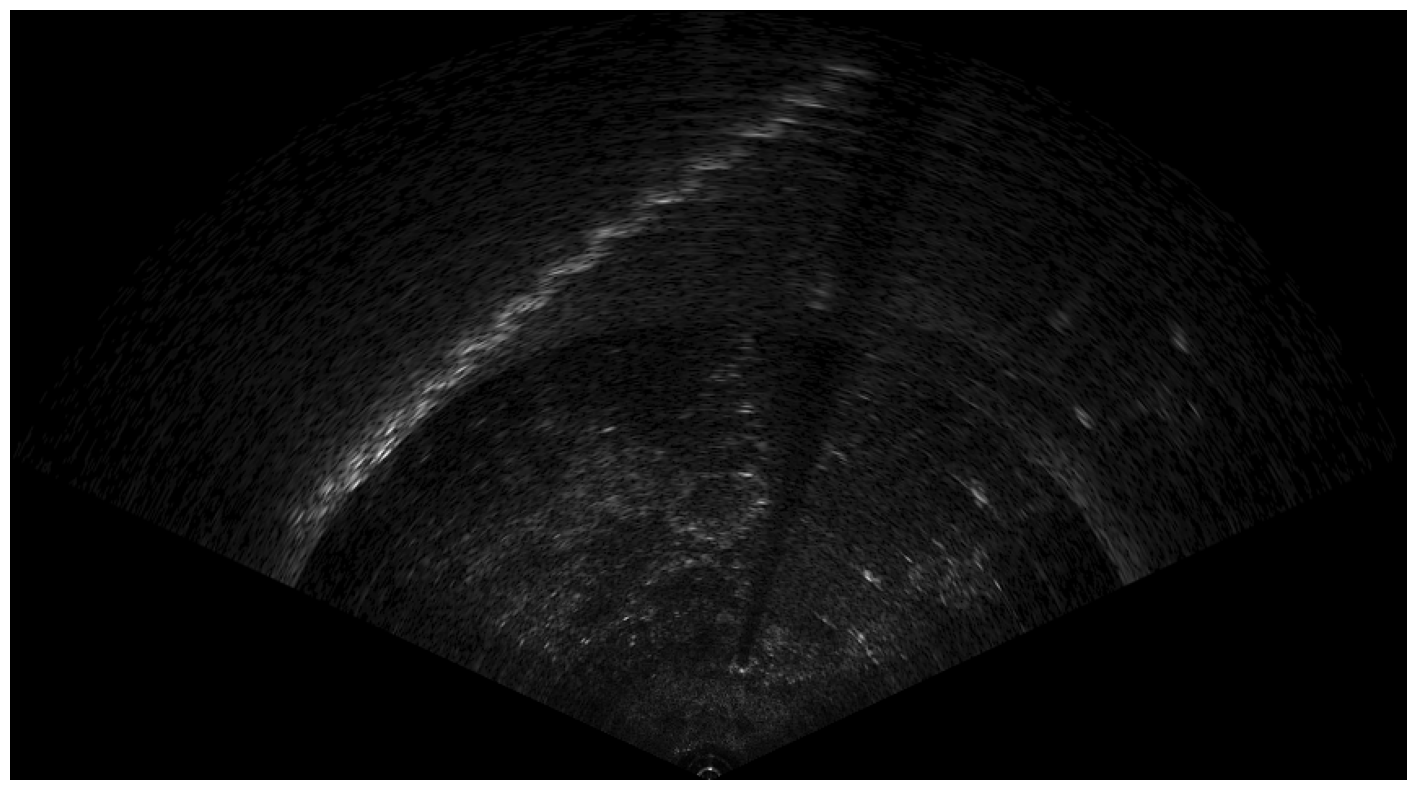

In [29]:
img = np.load("samples/cart_image.npy")
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap="gray")
plt.axis("off")

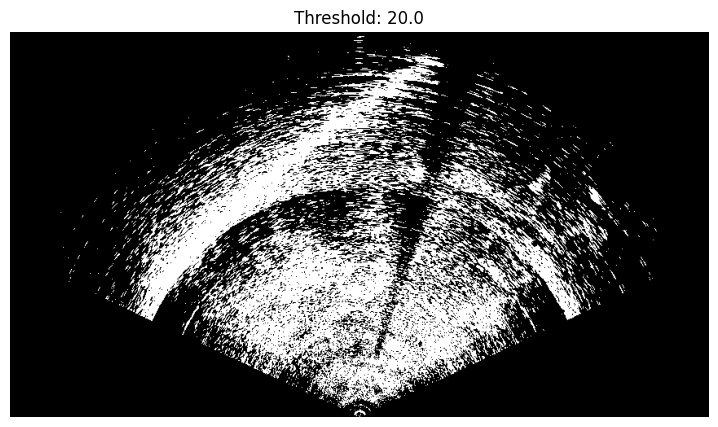

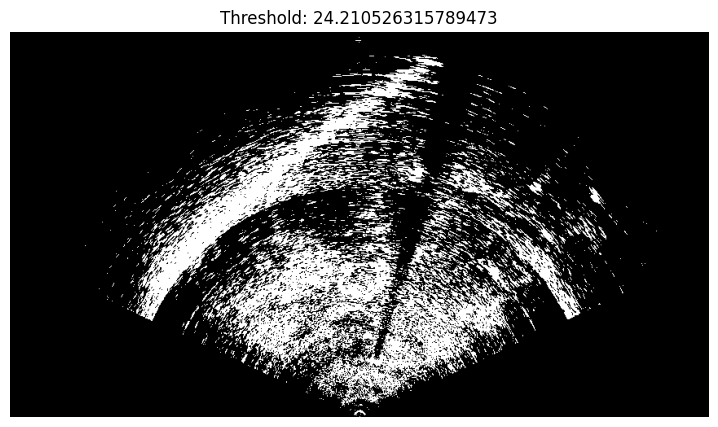

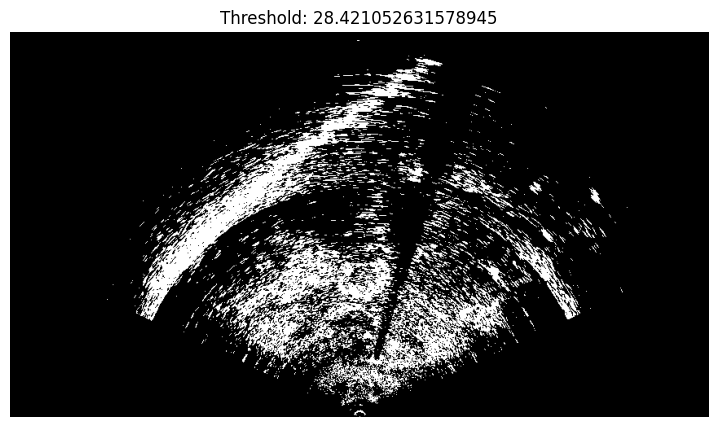

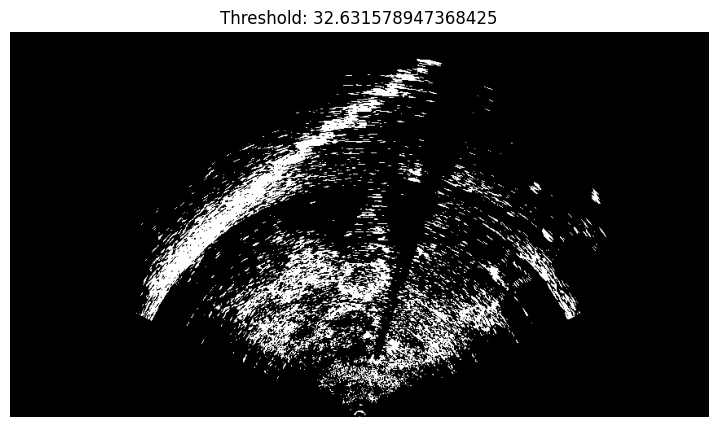

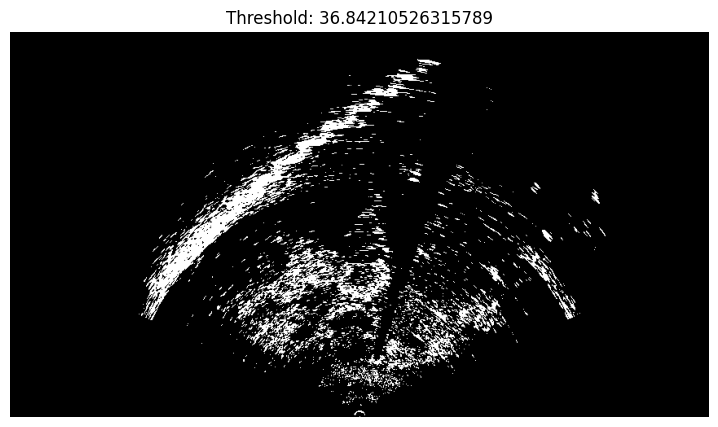

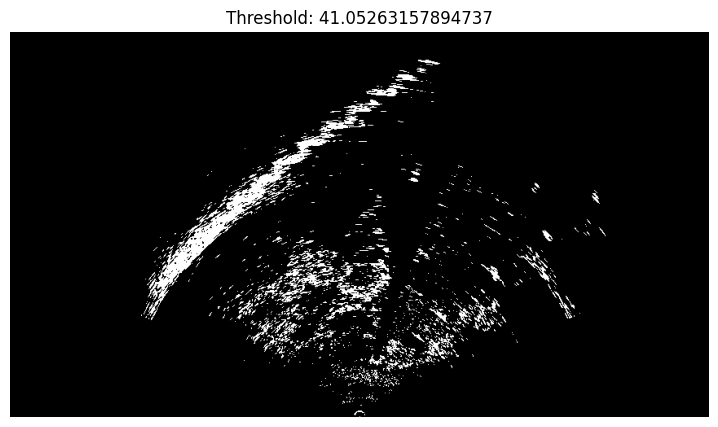

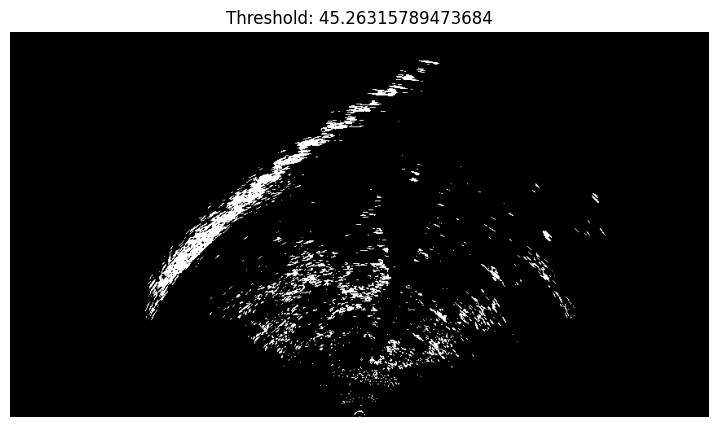

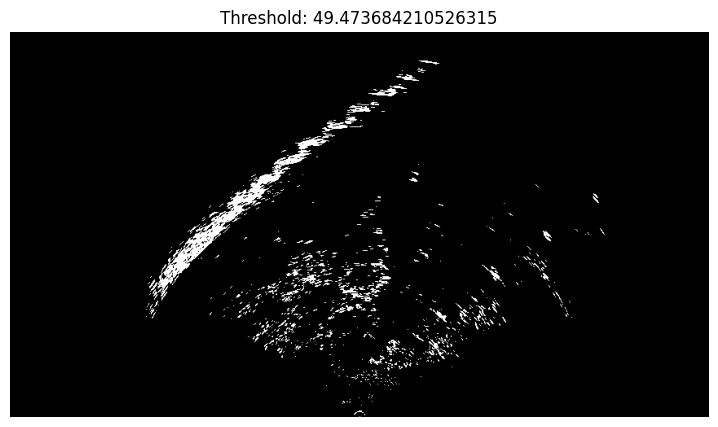

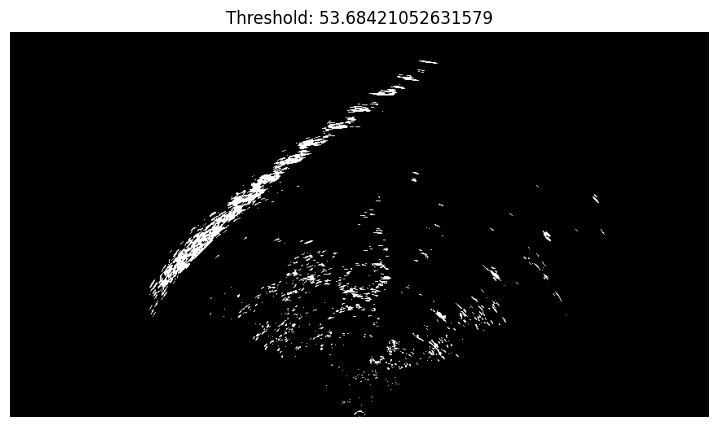

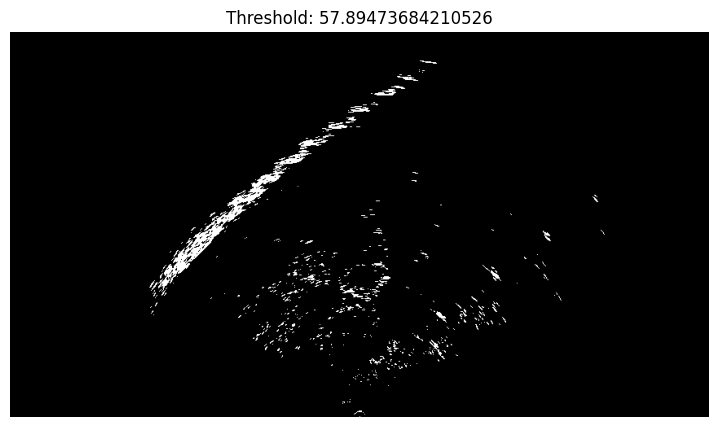

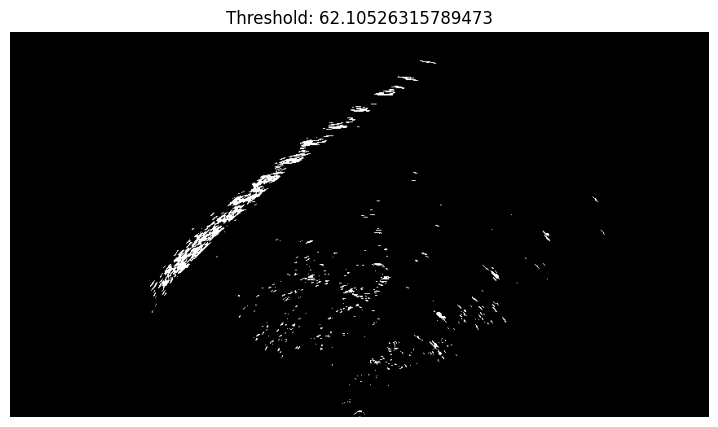

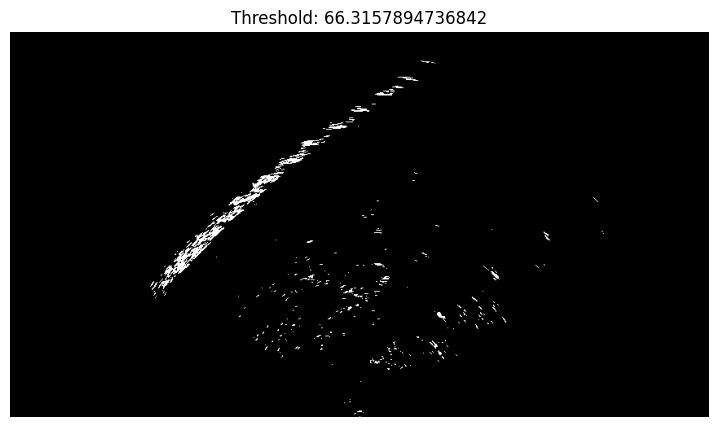

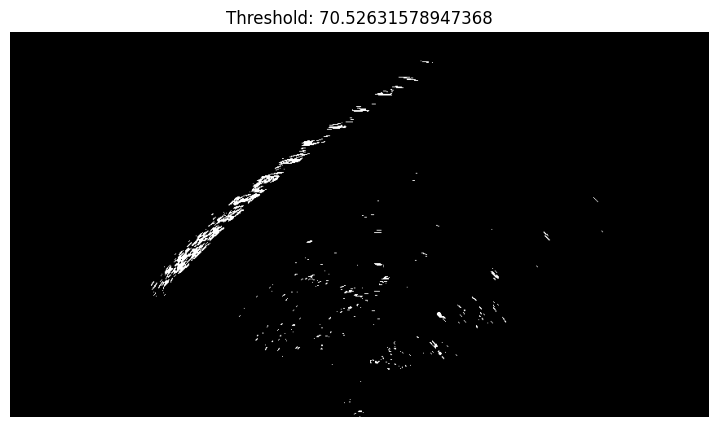

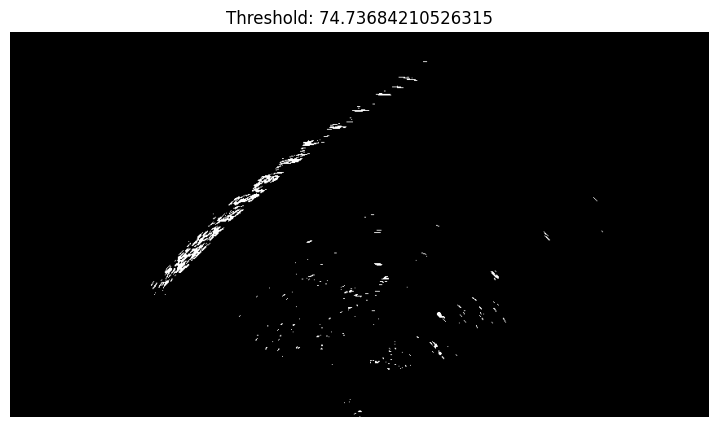

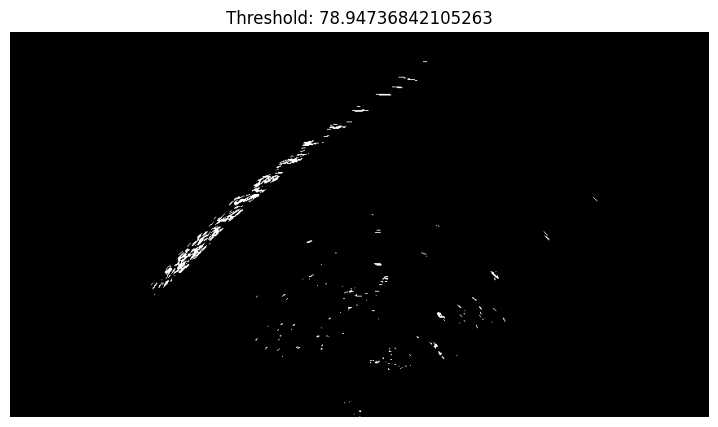

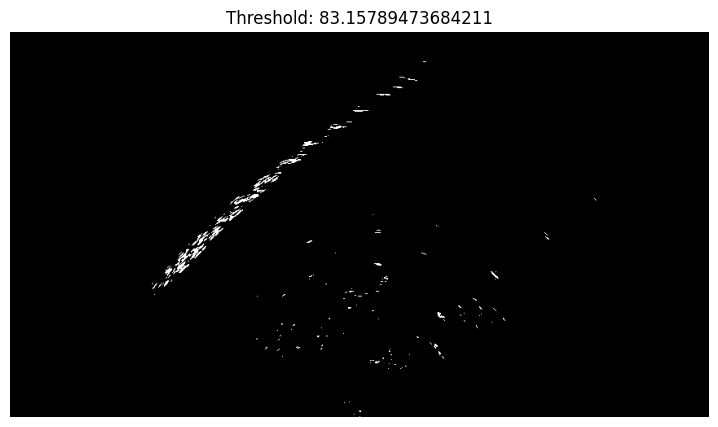

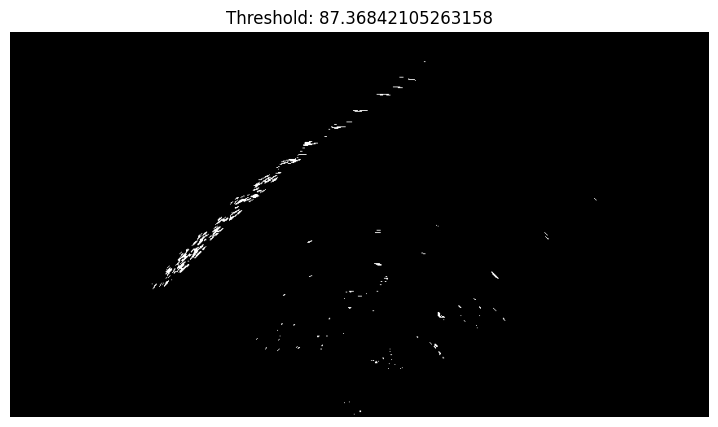

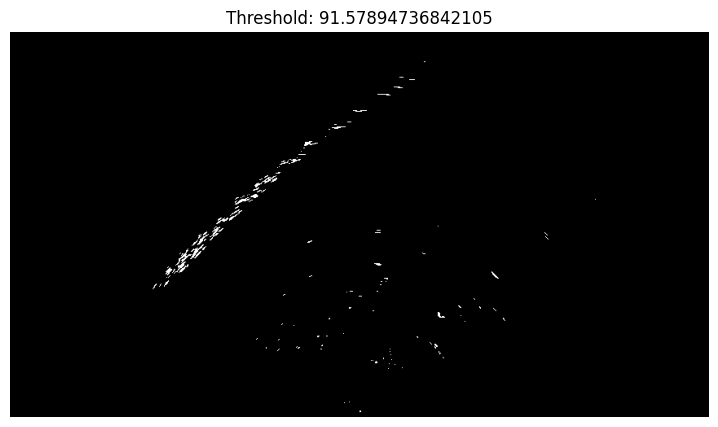

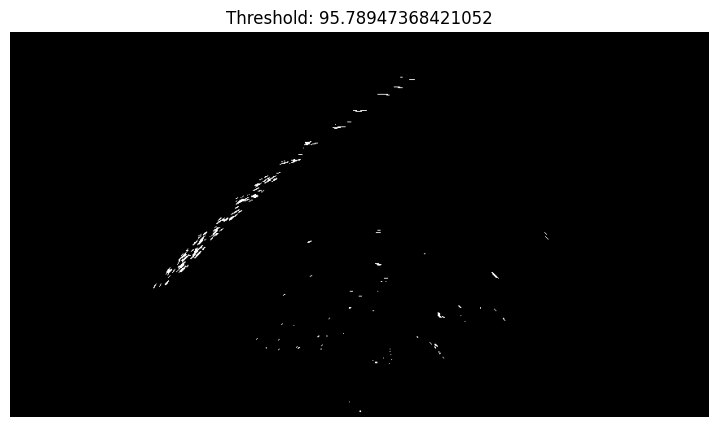

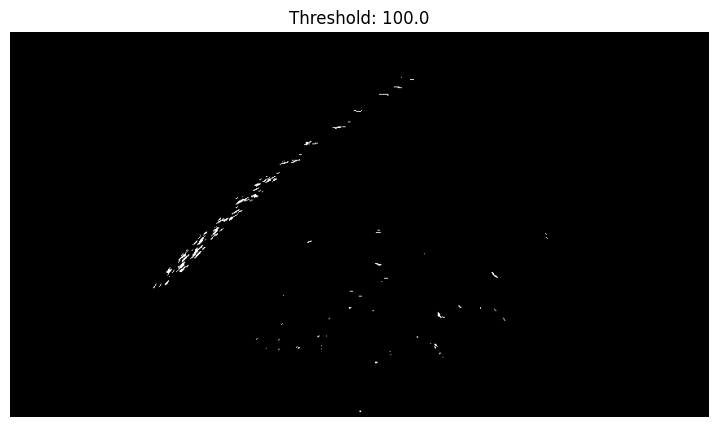

In [30]:
# Test 20 different thresholds
# A value of 50 looks good
thresholds = np.linspace(20, 100, 20)
for threshold in thresholds:
    binary_image = img > threshold
    plt.figure(figsize=(10, 5))
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Threshold: {threshold}")
    plt.show()

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

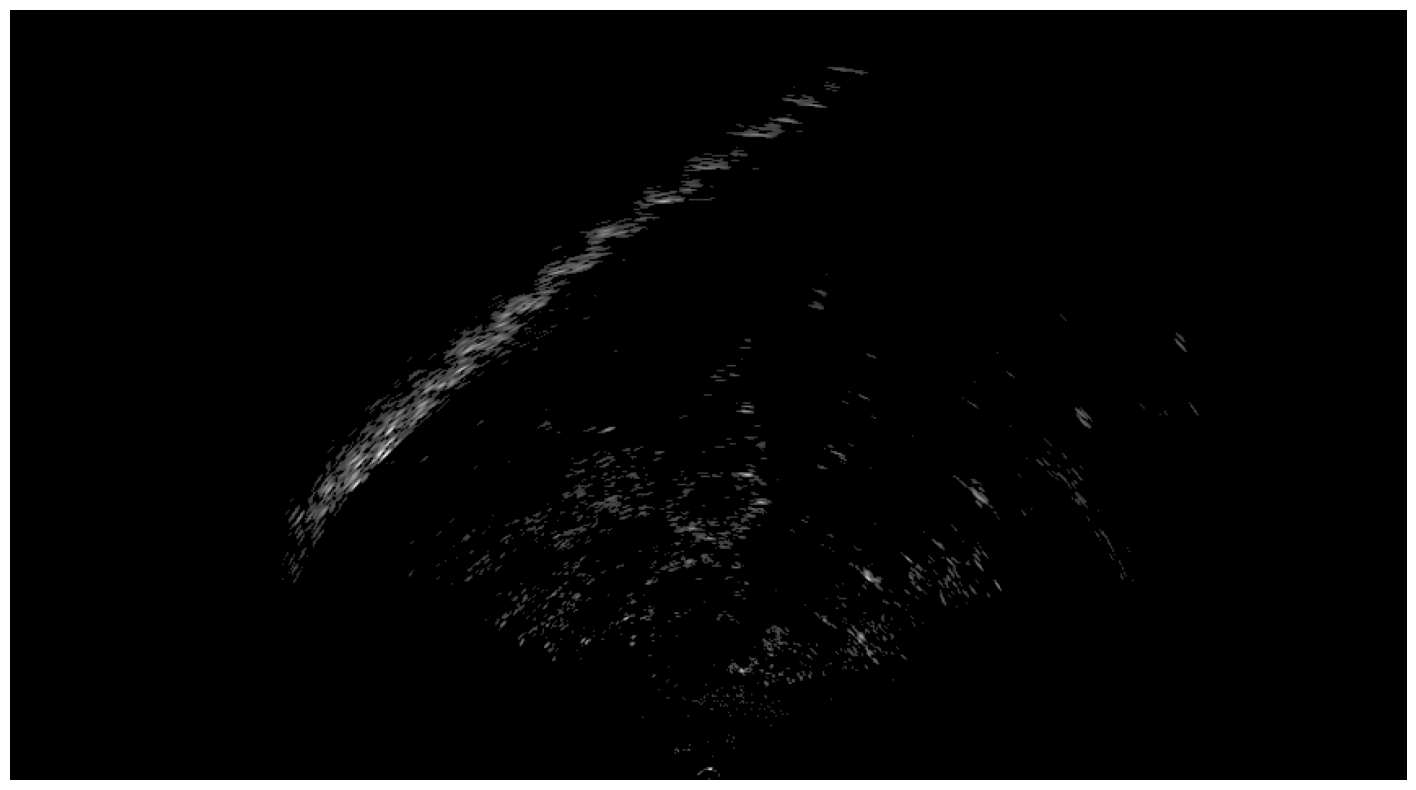

In [37]:
# Filter values under 50
filt = img.copy()
filt[filt < 50] = 0

plt.figure(figsize=(20, 10))
plt.imshow(filt, cmap="gray")
plt.axis("off")

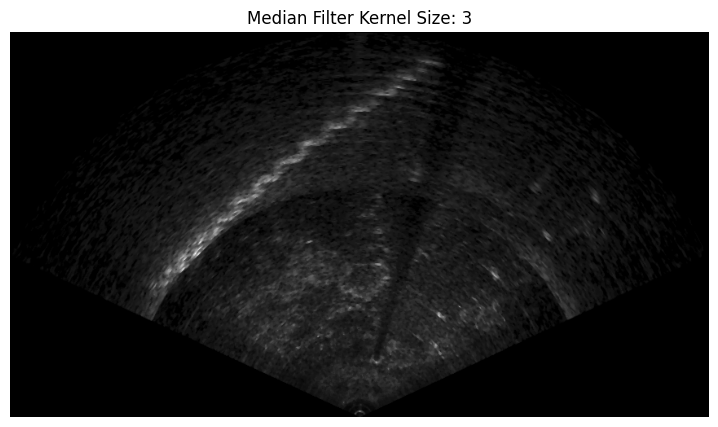

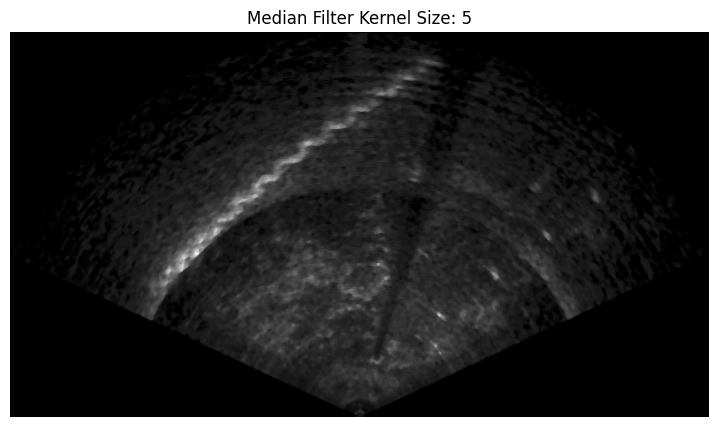

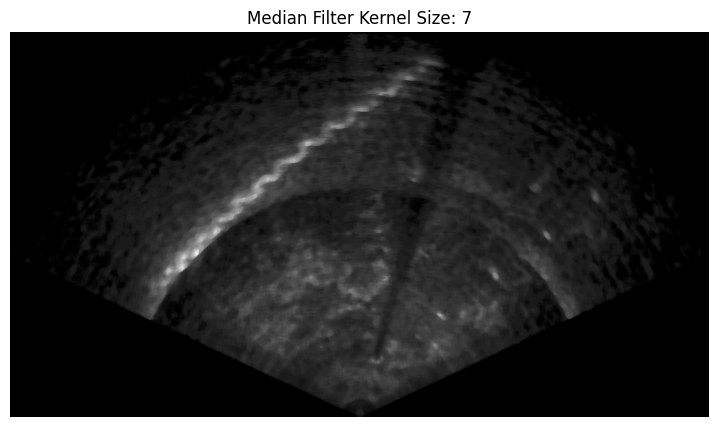

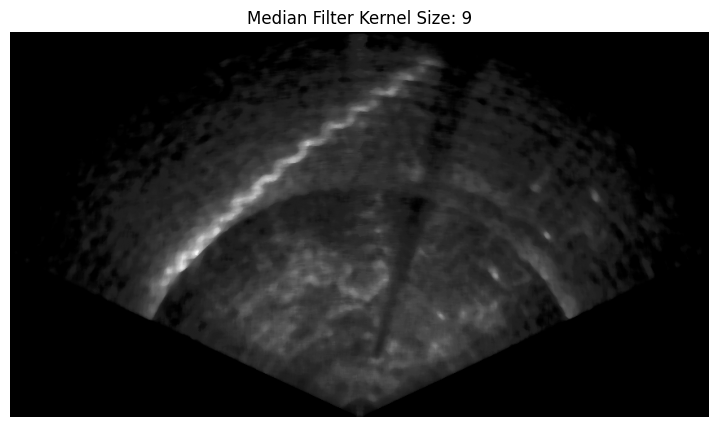

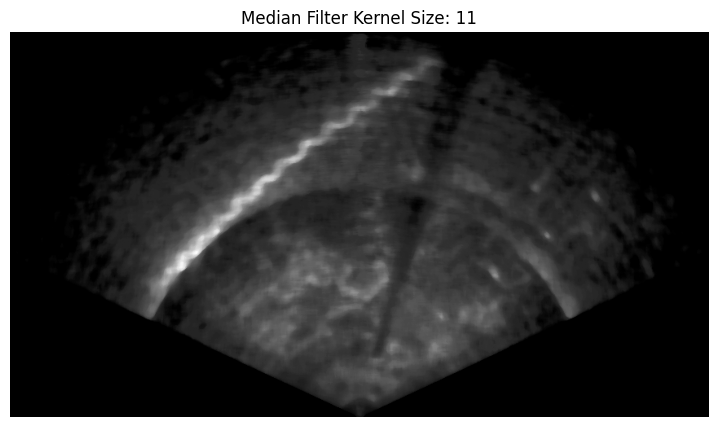

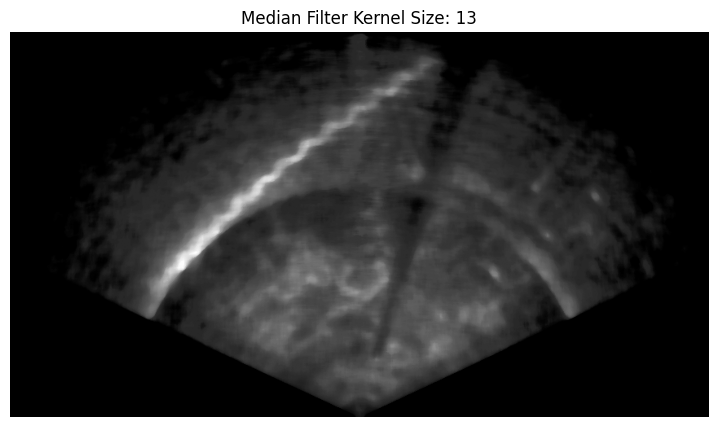

In [38]:
# Test median filter kernel sizes
kernel_sizes = [3, 5, 7, 9, 11, 13]
for kernel_size in kernel_sizes:
    filtered_image = median(img, np.ones((kernel_size, kernel_size)))
    plt.figure(figsize=(10, 5))
    plt.imshow(filtered_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Median Filter Kernel Size: {kernel_size}")
    plt.show()

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

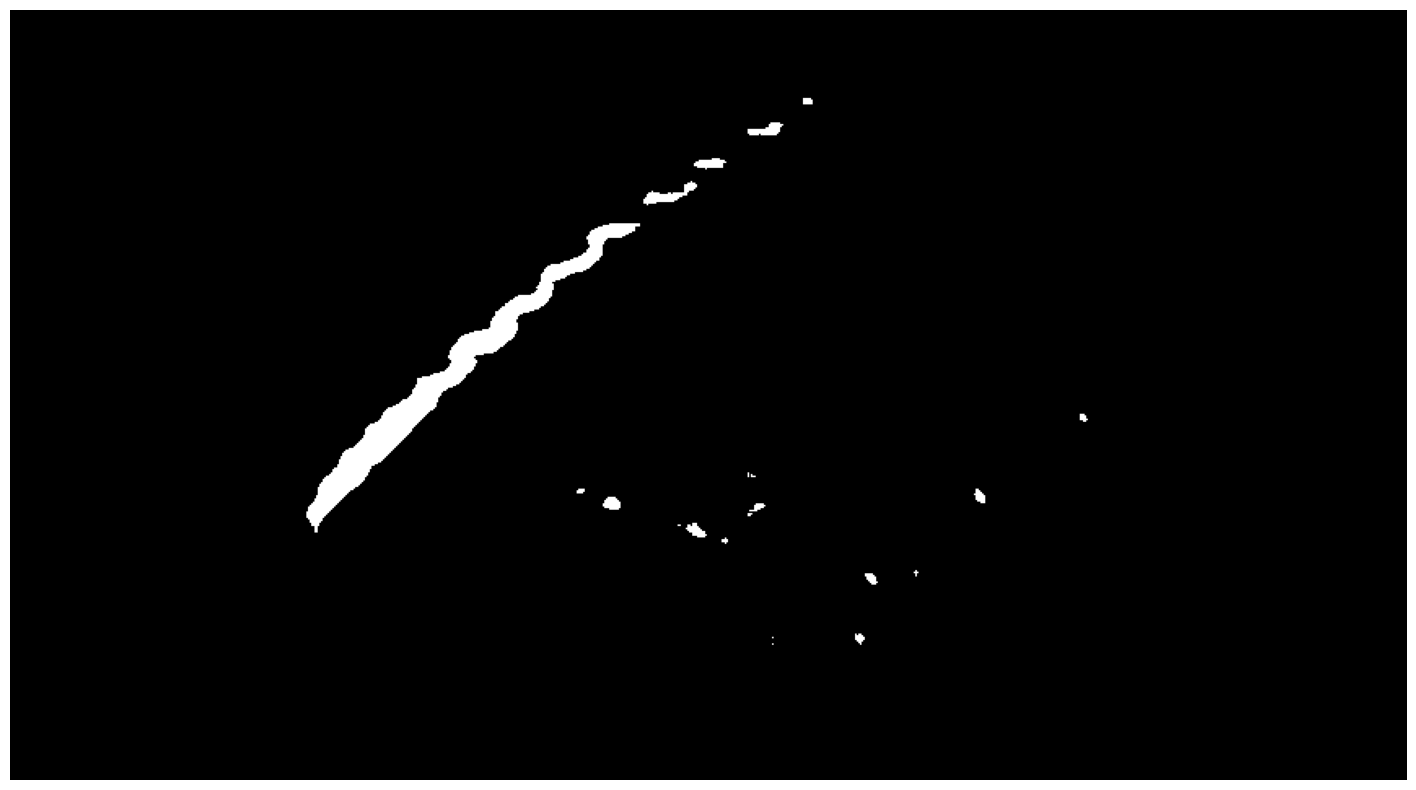

In [40]:
filtered_image = median(img, np.ones((9, 9)))
binary_image = filtered_image > 50
plt.figure(figsize=(20, 10))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")


(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

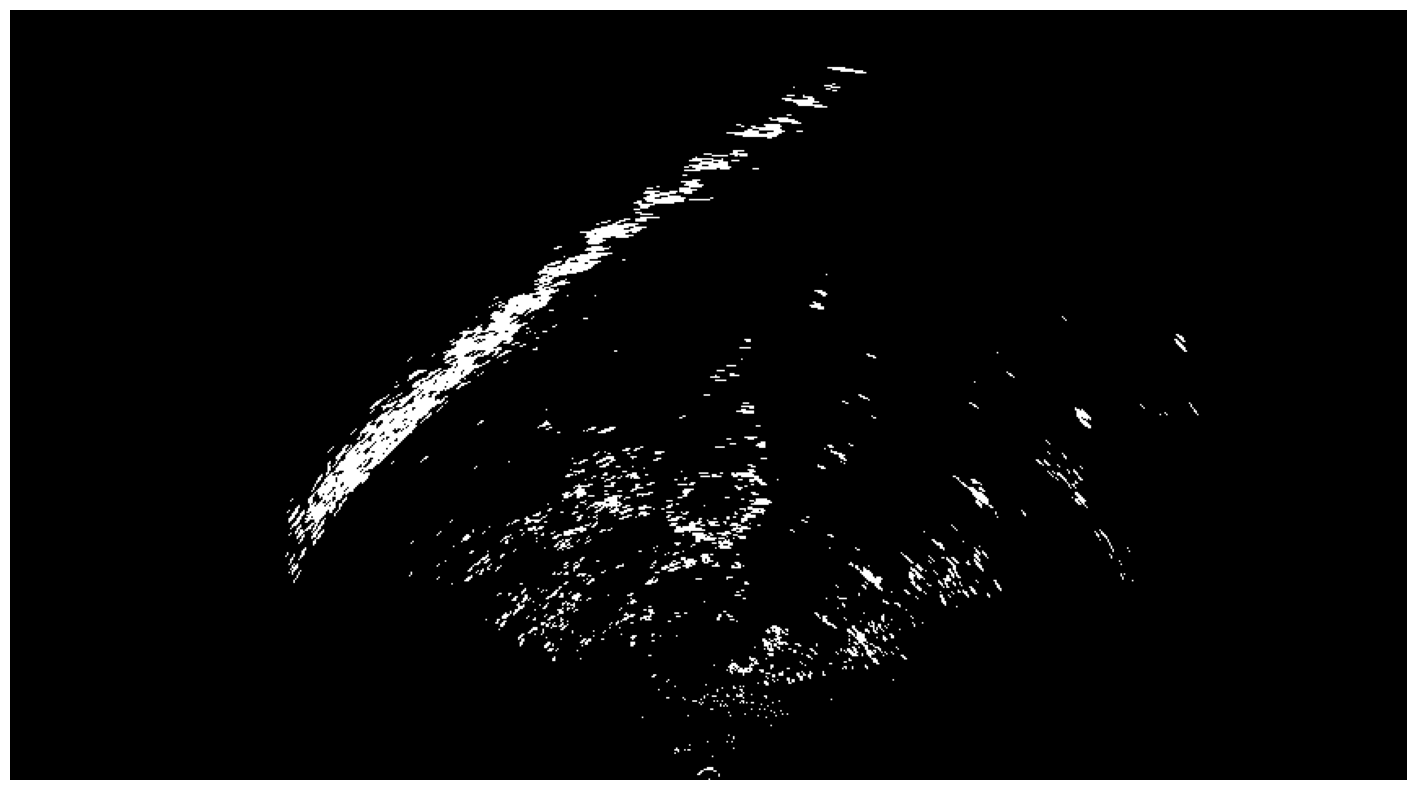

In [22]:
# Threshold the image
binary_image = img > 50
plt.figure(figsize=(20, 10))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")

# Polar view

My thinking was that using polar coordinates was better than cartesian for creating an automatic threshold, because then the black background around the data wouldn't be used. However in the polar coords it is generally harder to see what is going on. So i will stick with cartesian so i know that i am segmenting the right stuff 

Image shape: (473, 512)
Range shape: (473,)
Gain shape: (473,)
Bearing shape: (512,)


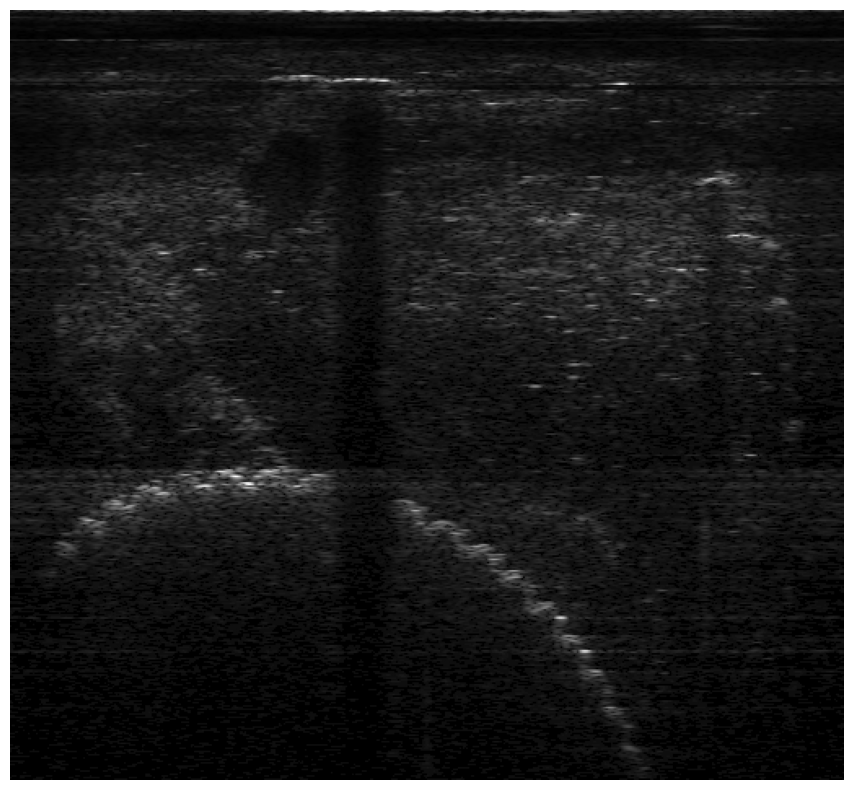

In [10]:
img = np.load("samples/polar/img.npy")
range = np.load("samples/polar/range.npy")
gain = np.load("samples/polar/gain.npy")
bearing = np.load("samples/polar/bearing.npy")

# Show image
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap="gray")
plt.axis("off")

# Print shapes
print("Image shape:", img.shape)
print("Range shape:", range.shape)
print("Gain shape:", gain.shape)
print("Bearing shape:", bearing.shape)

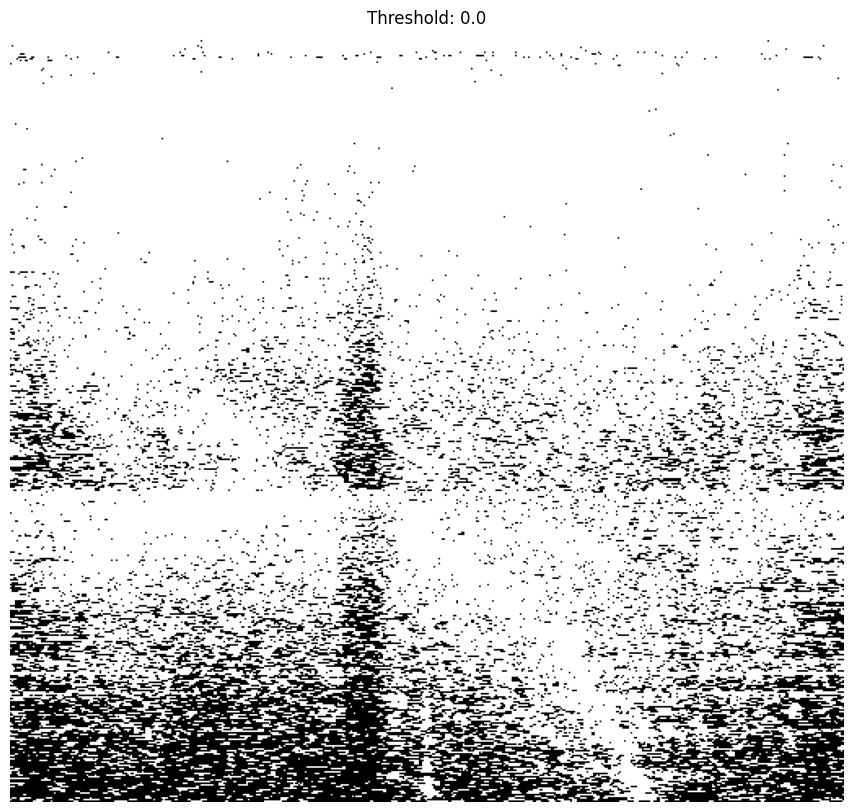

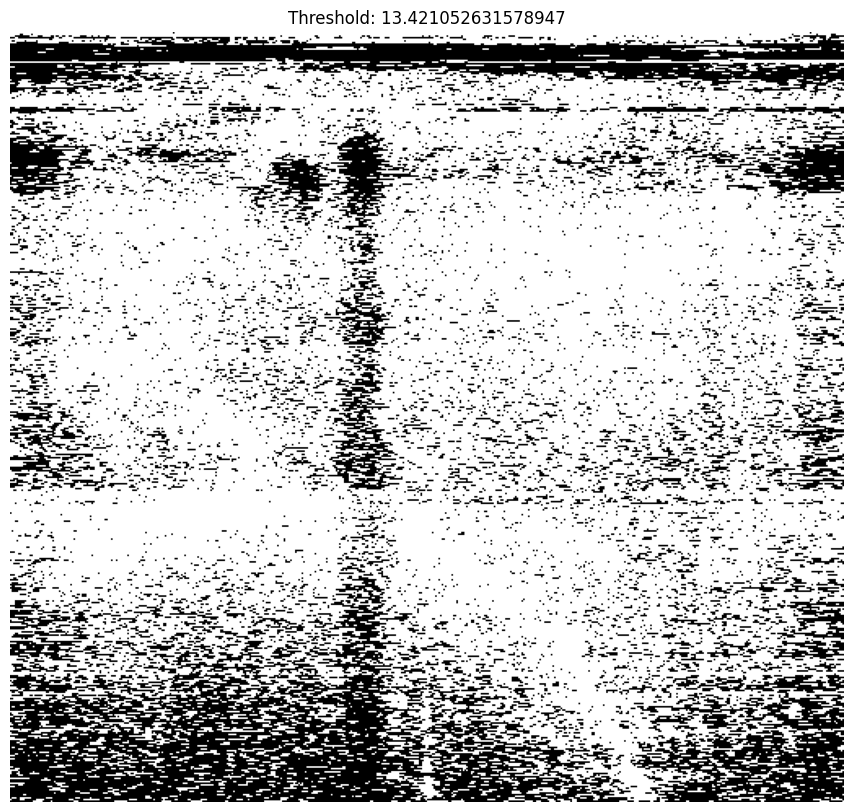

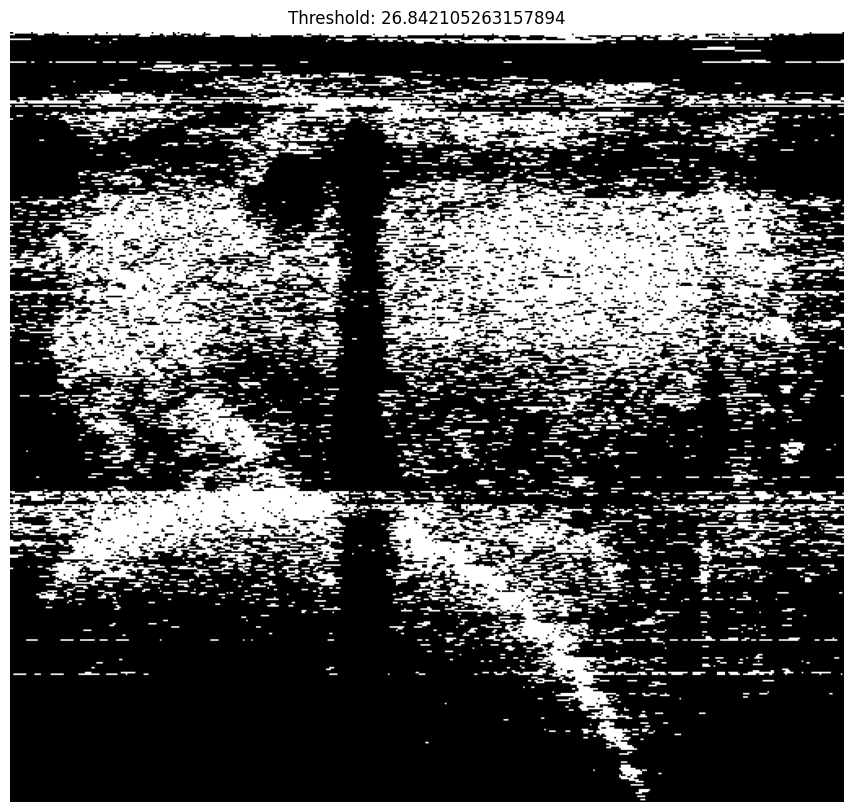

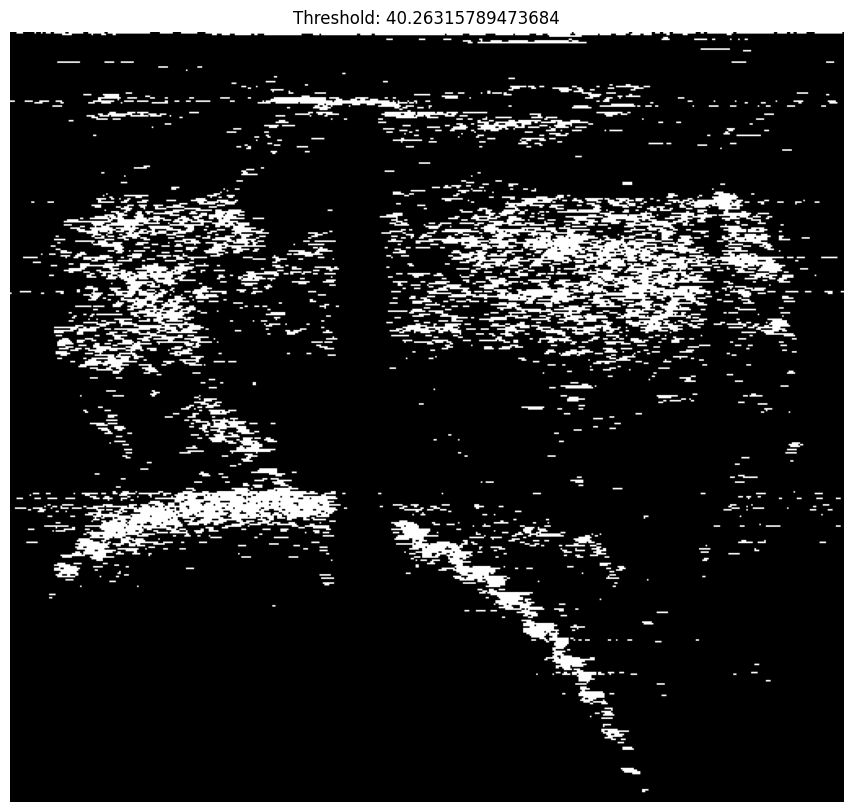

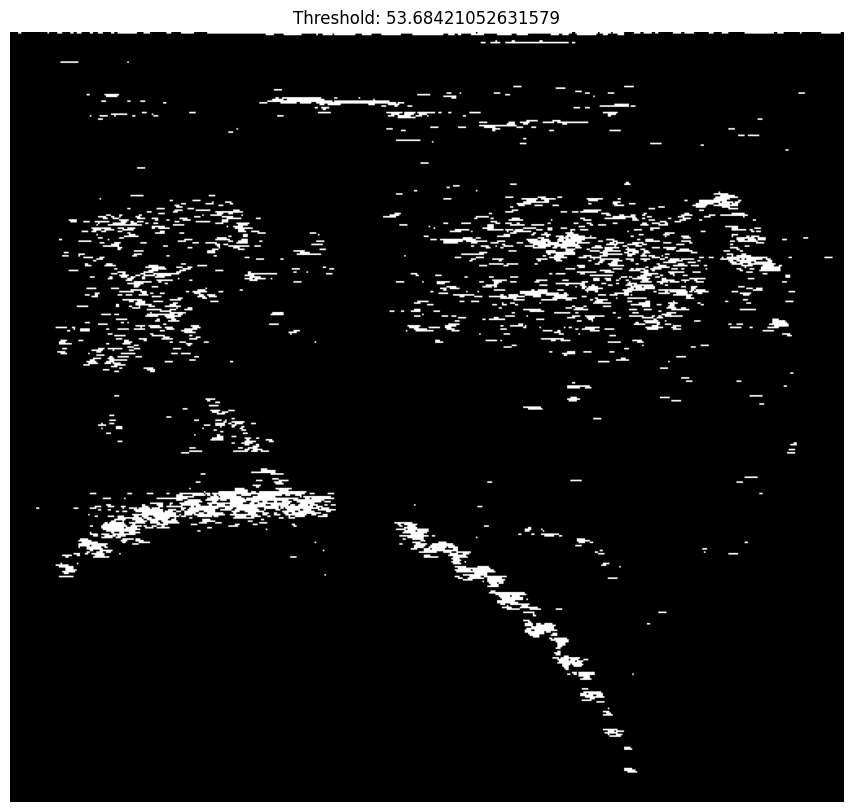

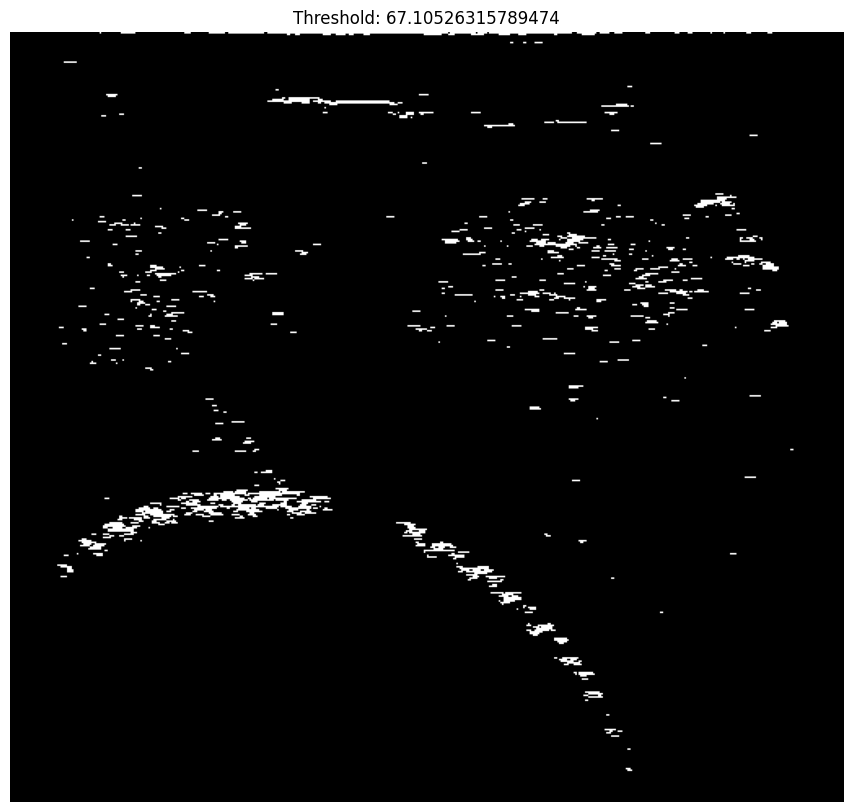

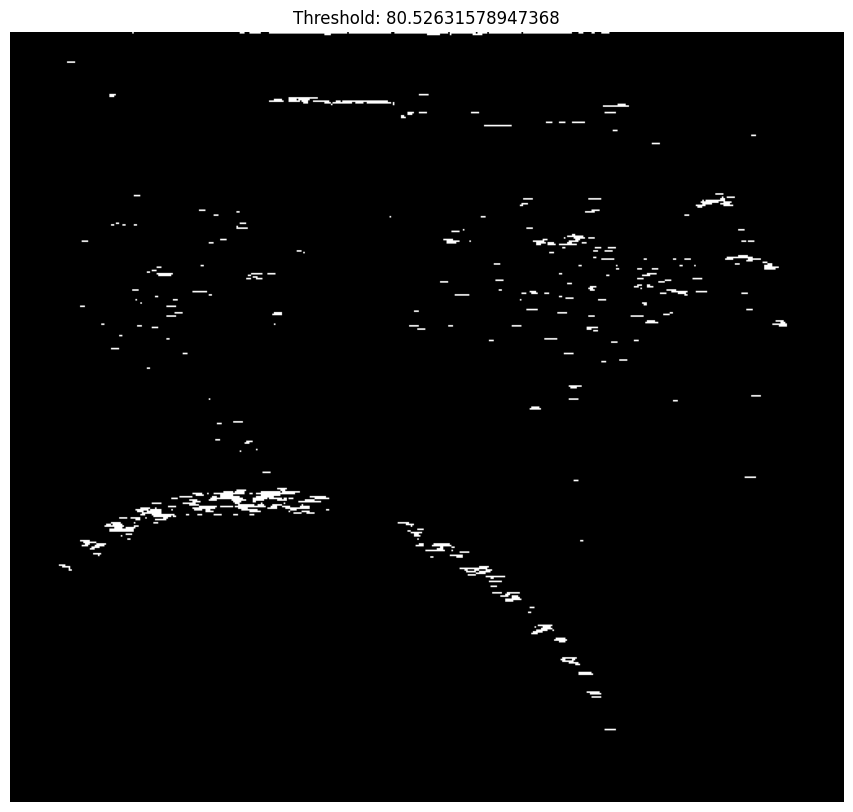

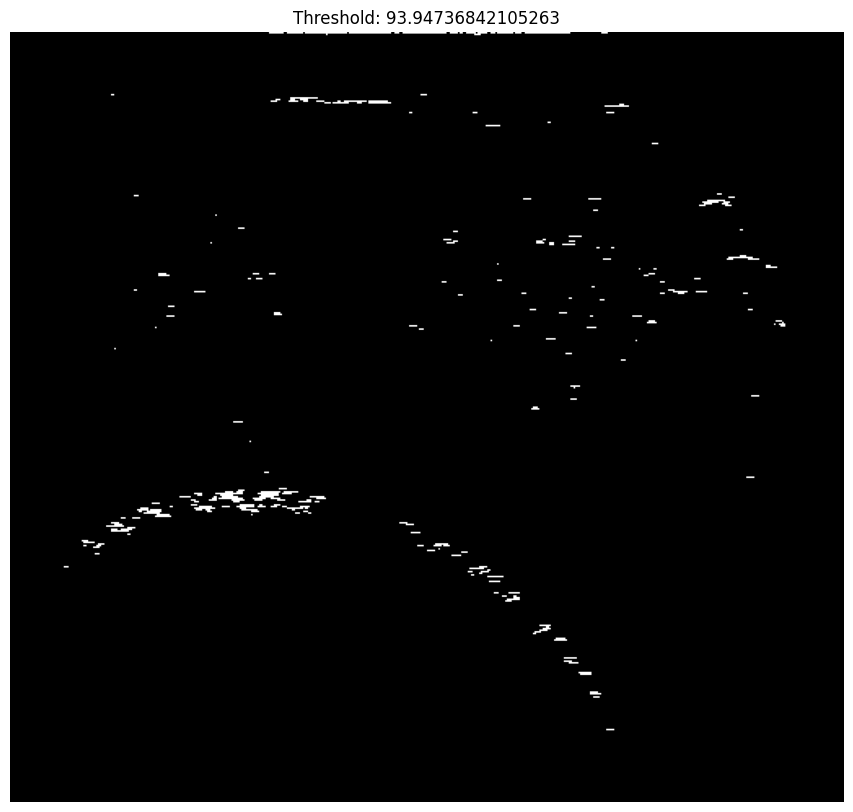

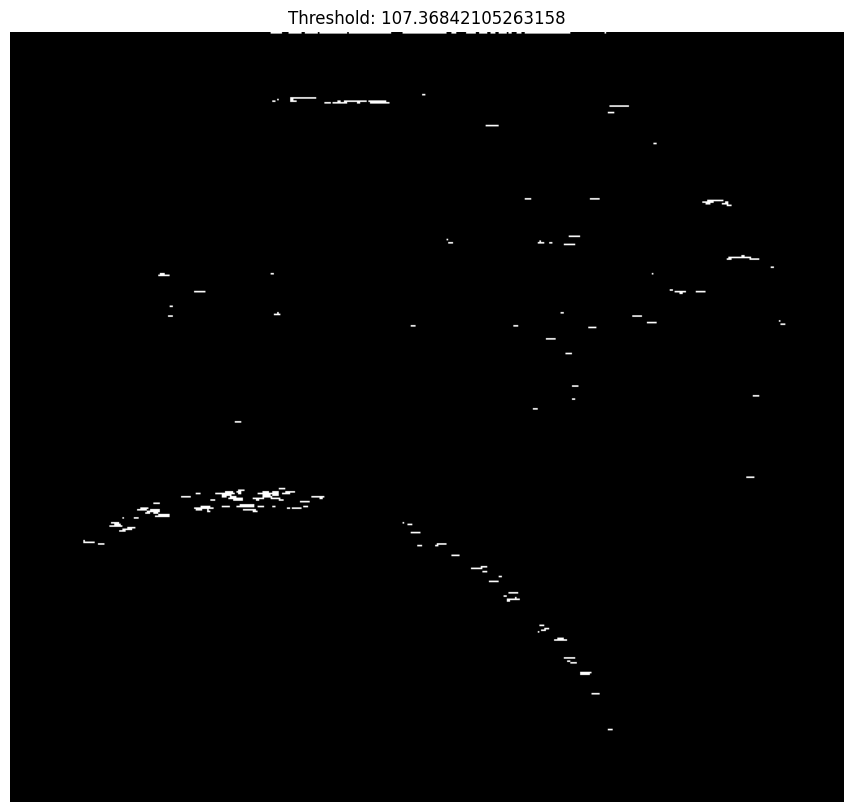

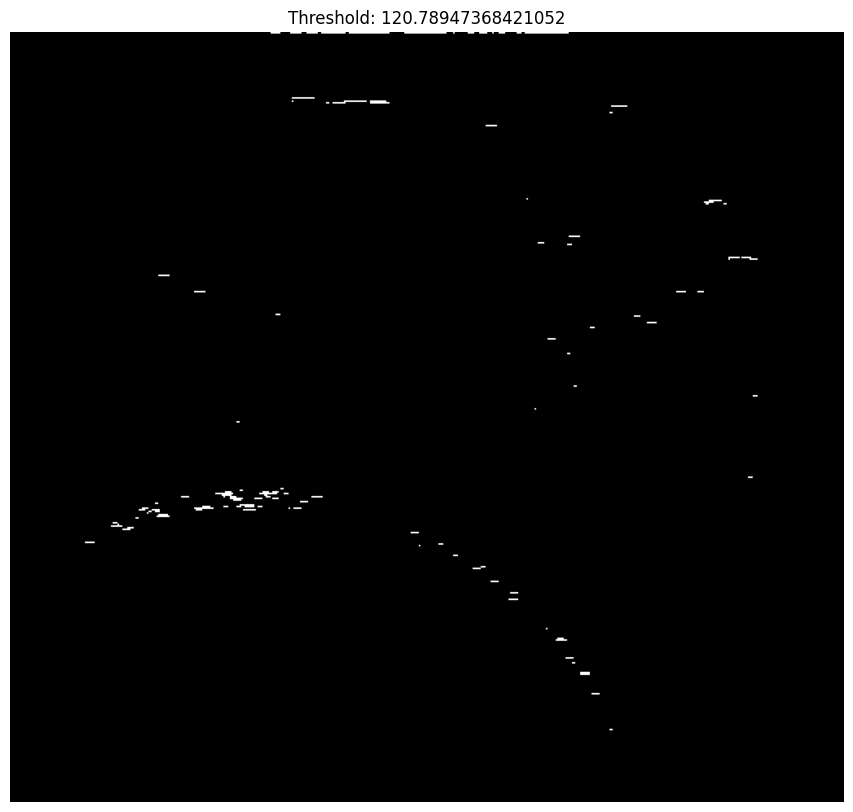

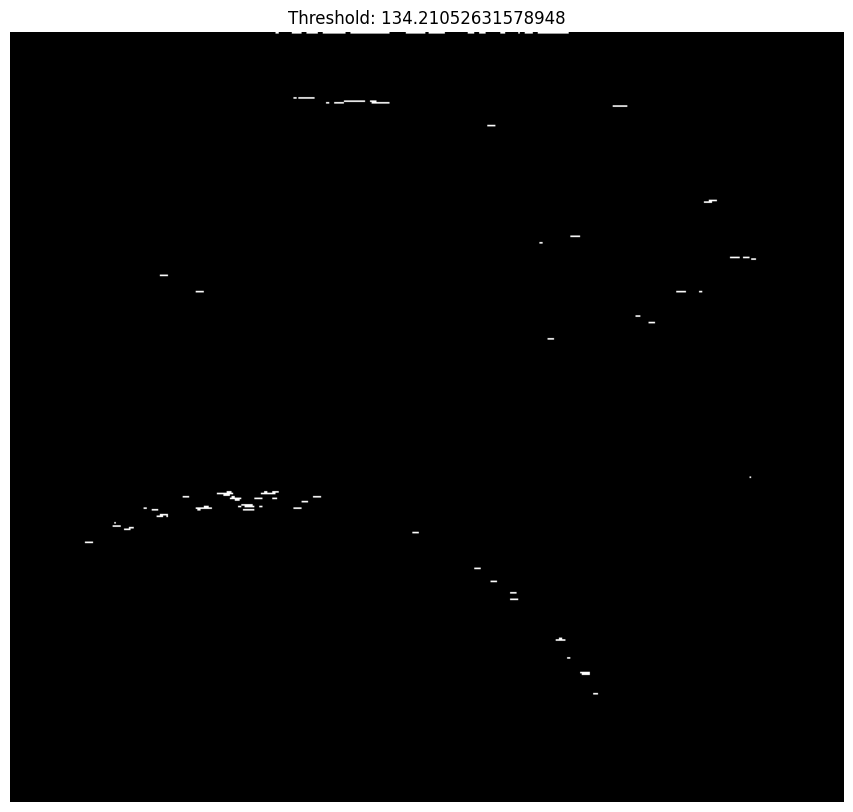

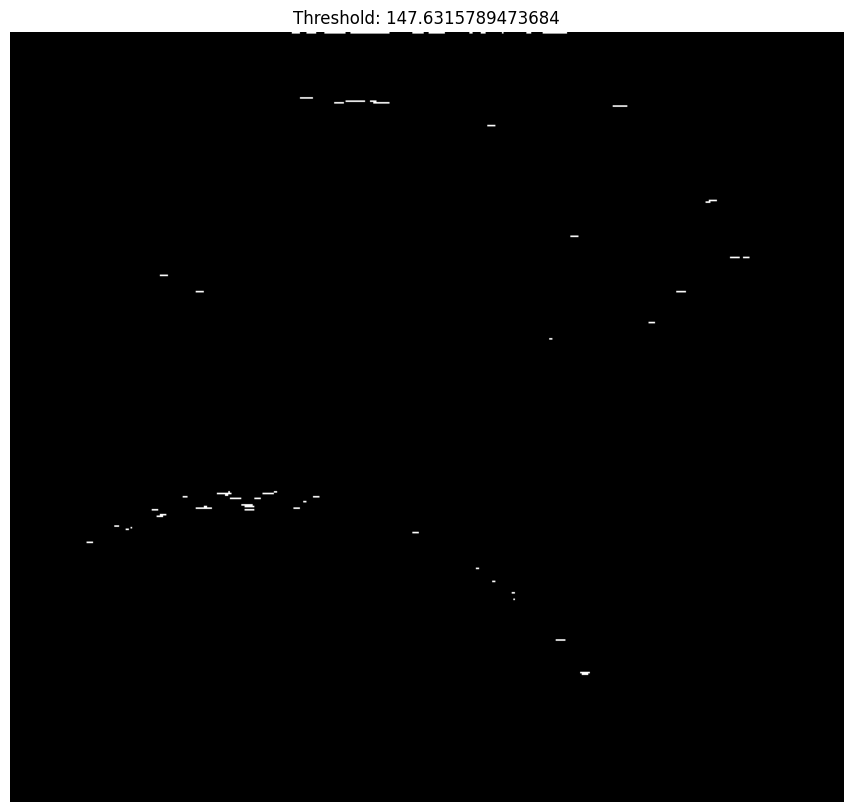

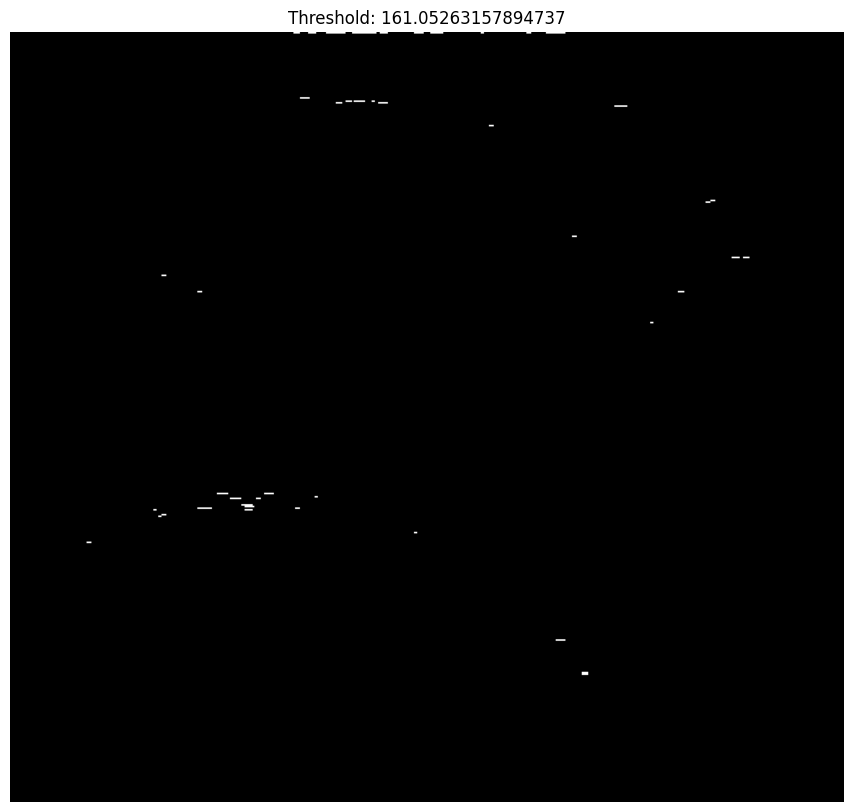

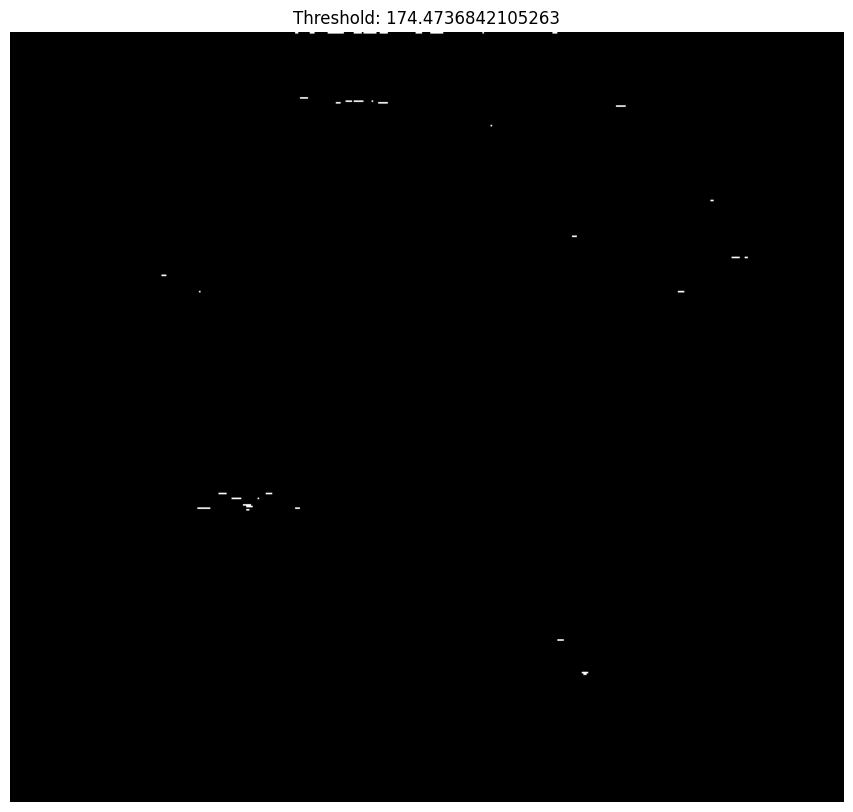

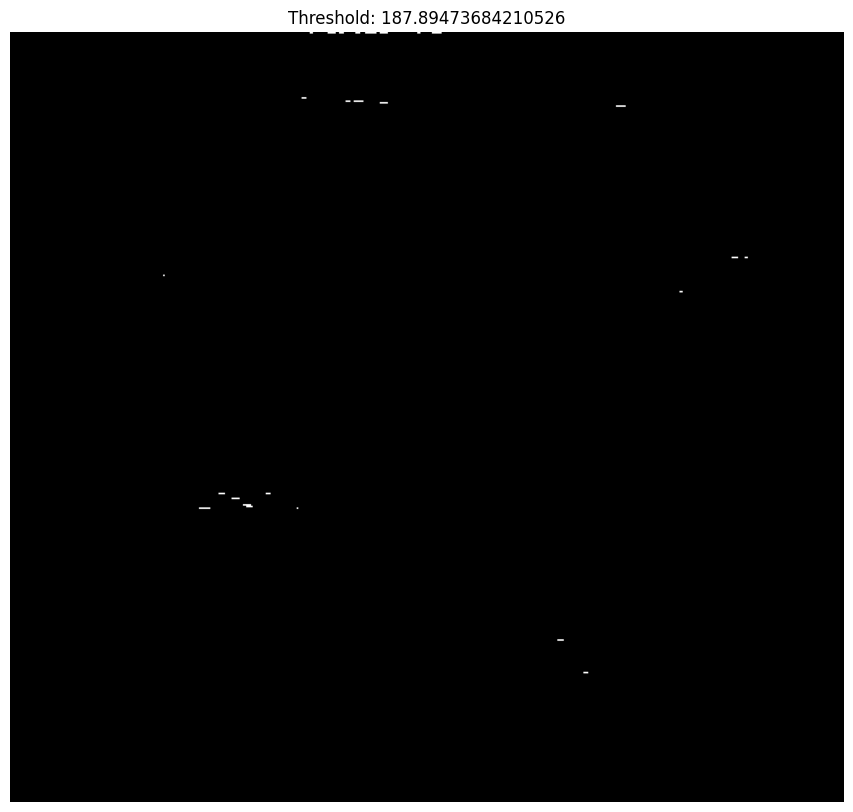

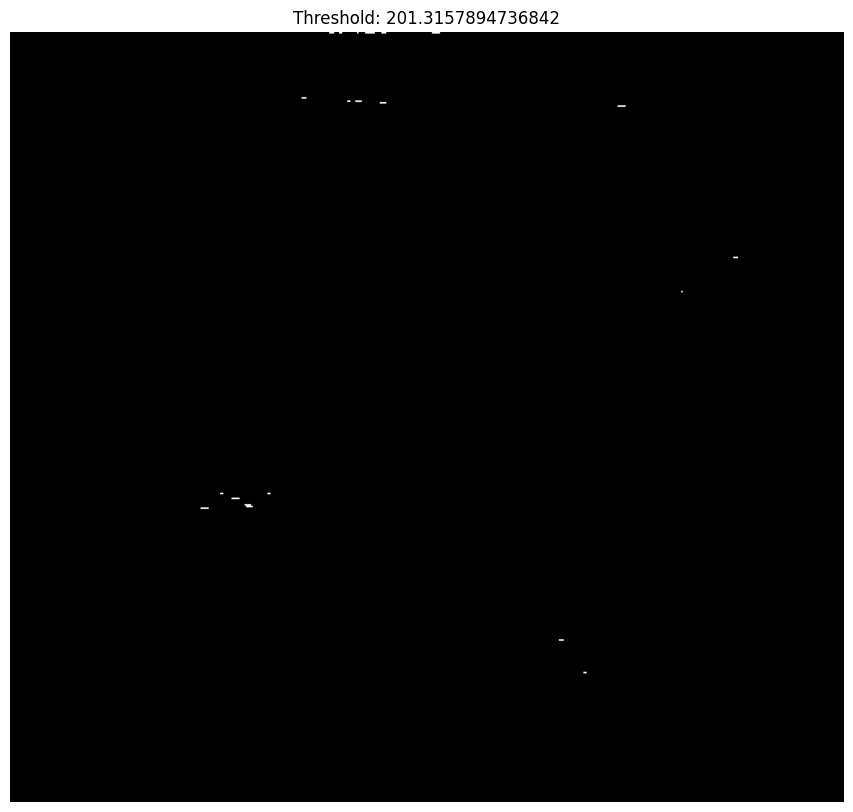

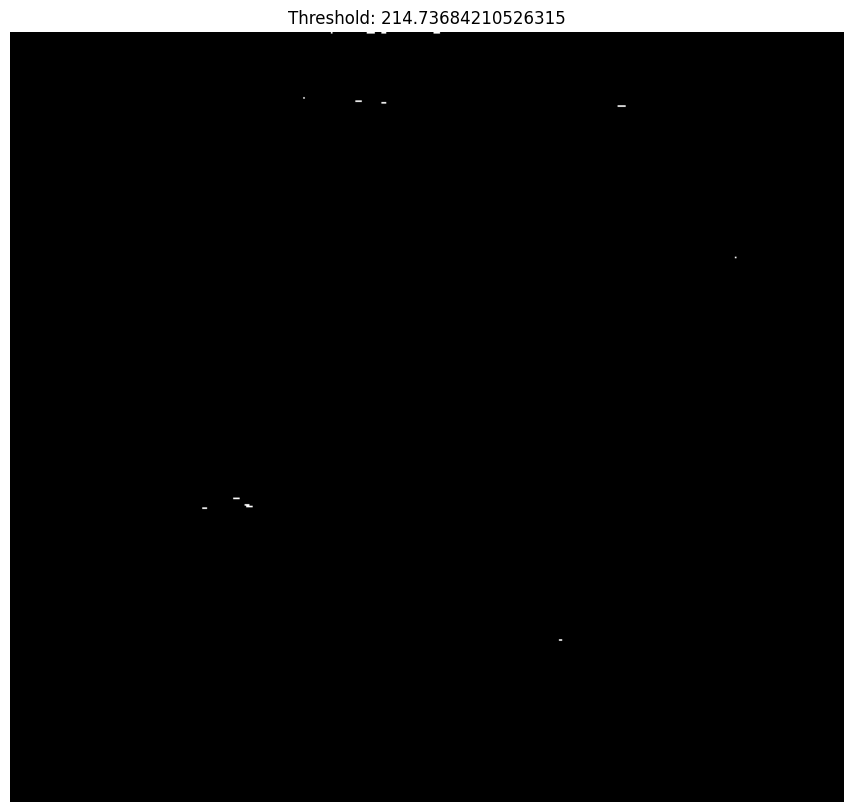

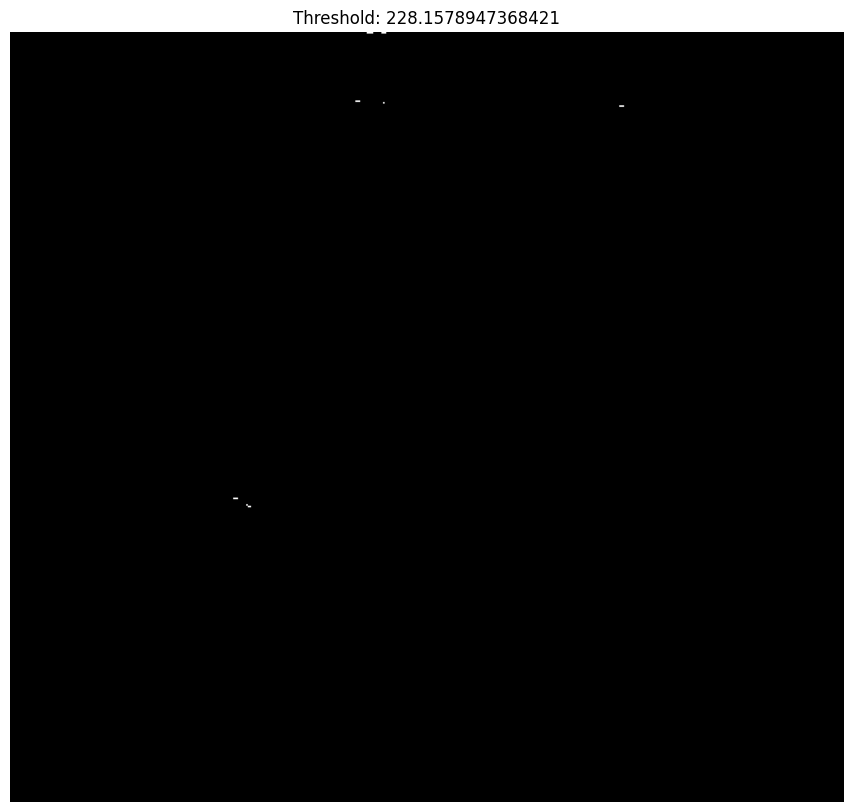

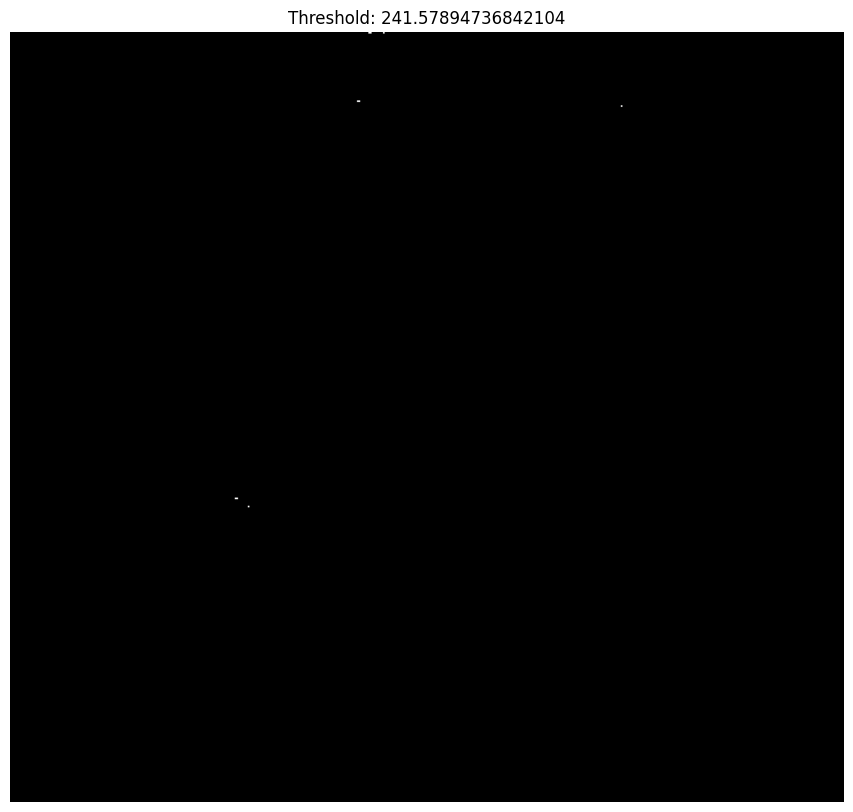

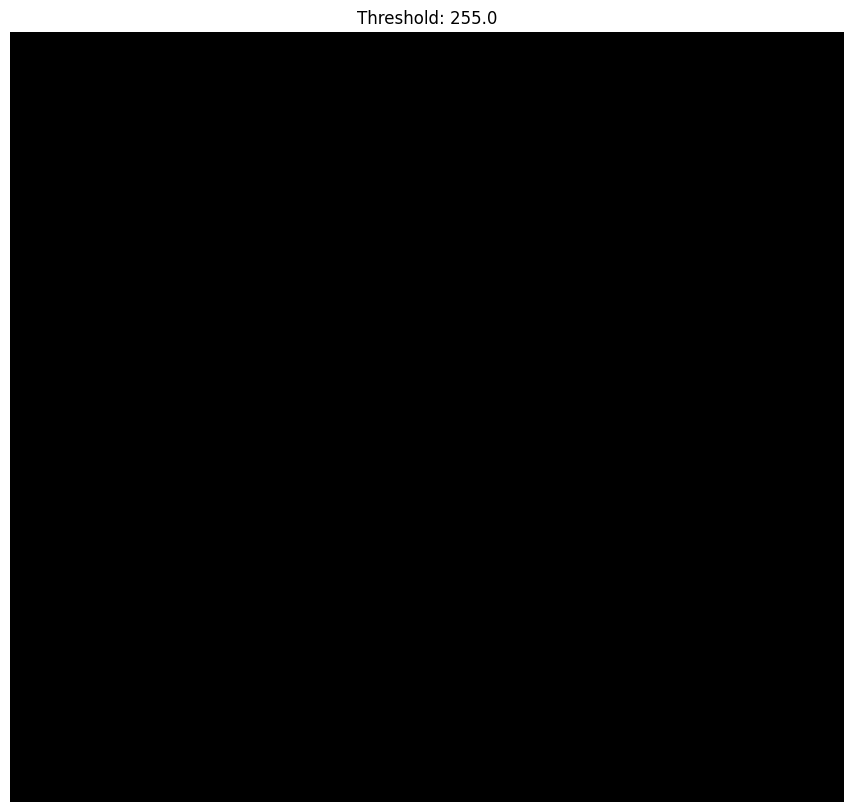

In [16]:
# Test 20 different thresholds
thresholds = np.linspace(0, 255, 20)
for threshold in thresholds:
    binary_image = img > threshold
    plt.figure(figsize=(20, 10))
    plt.imshow(binary_image, cmap="gray")
    plt.axis("off")
    plt.title(f"Threshold: {threshold}")
    plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(472.5), np.float64(-0.5))

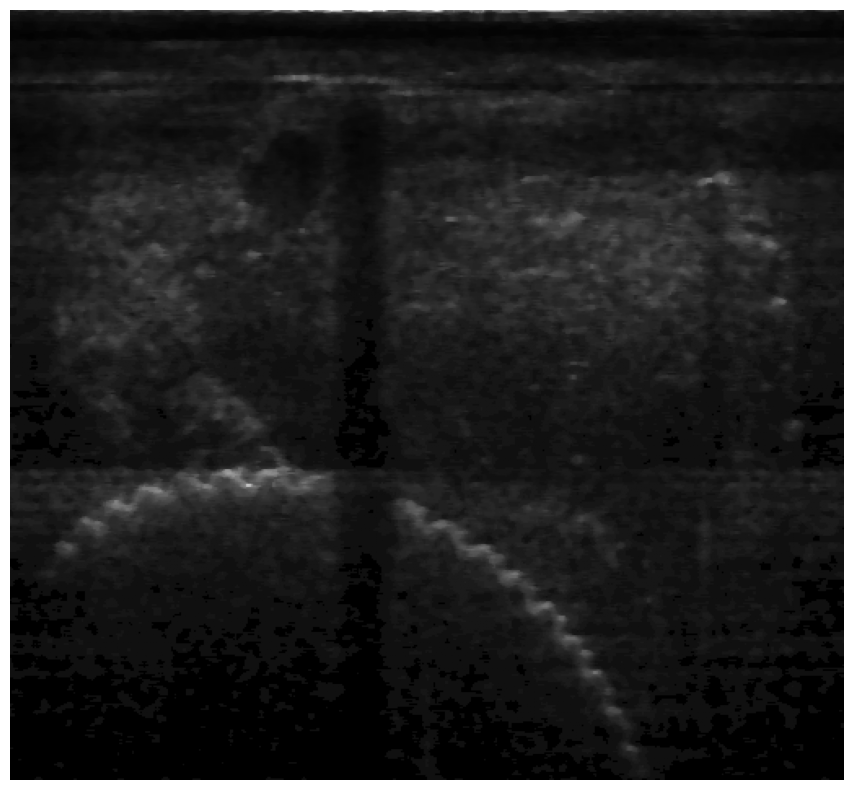

In [7]:
# Apply median filter
img_median = median(img, np.ones((5, 5)))

# Apply otsu thresholding
thresh = threshold_otsu(img_median)
binary_image = img_median > thresh



plt.figure(figsize=(20, 10))
plt.imshow(img_median, cmap="gray")
plt.axis("off")